<a href="https://colab.research.google.com/github/MrCherveN/Machine-Learning--4-0_HomeTasks/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

medical_df = pd.read_csv('/content/drive/MyDrive/Python/Machine Learning для людей  4.0/Модуль 2. Навчання з учителем/Тема 2.1 Лінійна регресія. Методи оцінки точності прогностичної моделі/data/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
import numpy as np
import matplotlib.pyplot as plt

***1.Метод МНК (з використанням тільки numpy, без scikit learn)***

In [4]:
X = non_smoker_df[['age']].to_numpy()
y = non_smoker_df['charges'].to_numpy()

X.shape, y.shape

((1064, 1), (1064,))

In [5]:
# Додаємо колонку одиничок аби задати константу в моделі регресії
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X_with_intercept[:4,:]

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       [ 1., 32.]])

In [6]:
MNK_coefs = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)).dot(X_with_intercept.T).dot(y)

print(f'Коефіцієнти моделі:\n {MNK_coefs}')

Коефіцієнти моделі:
 [-2091.42055657   267.24891283]


In [7]:
# прогнози моделі
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 array([ 1725.5523 ,  4449.462  , 21984.47061]))

In [8]:
# точність прогнозу RMSE
rmse = np.sqrt((np.mean(np.square((y - predictions_MNK)))))
print(f'RMSE = {rmse}')

RMSE = 4662.505766636395


***2.Full-Batch градієнтного спуску з numpy***

In [9]:
# Full-Batch Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors


In [10]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.001, epochs=200000)
predictions_fbgd = m * X[:, 0] + b

print('Коефіцієнти з Full-Batch град. спуску: ', b, m)

/tmp/ipython-input-3822415885.py:9: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error**2))
/tmp/ipython-input-3822415885.py:9: RuntimeWarning: overflow encountered in square
  errors.append(sum(error**2))
/tmp/ipython-input-3822415885.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - lr * m_gradient


Коефіцієнти з Full-Batch град. спуску:  nan nan


In [11]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=200000)
predictions_fbgd_2 = m * X[:, 0] + b

print('Коефіцієнти з Full-Batch град. спуску: ', b, m)

Коефіцієнти з Full-Batch град. спуску:  -2068.7906105520456 266.7393863144744


In [12]:
rmse_fbgd_2 = np.sqrt((np.mean(np.square((y - predictions_fbgd_2)))))
print(f'RMSE_fbgd = {rmse_fbgd_2}')

RMSE_fbgd = 4662.511987422228


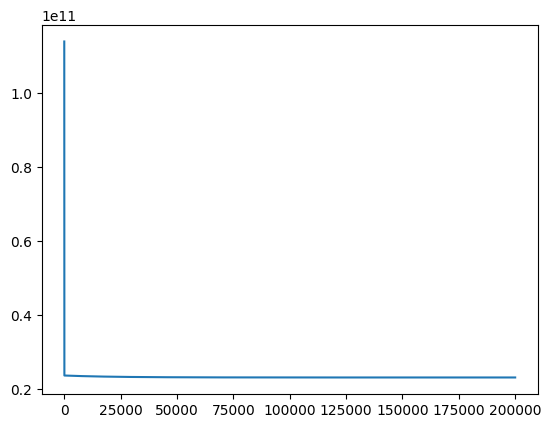

In [13]:
plt.plot(errors);

In [14]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.00001, epochs=200000)
predictions_fbgd_3 = m * X[:, 0] + b

print('Коефіцієнти з Full-Batch град. спуску: ', b, m)

Коефіцієнти з Full-Batch град. спуску:  -758.536288220586 237.23824121686818


In [15]:
rmse_fbgd_3 = np.sqrt((np.mean(np.square((y - predictions_fbgd_3)))))
print(f'RMSE_fbgd = {rmse_fbgd_3}')

RMSE_fbgd = 4684.0366468426355


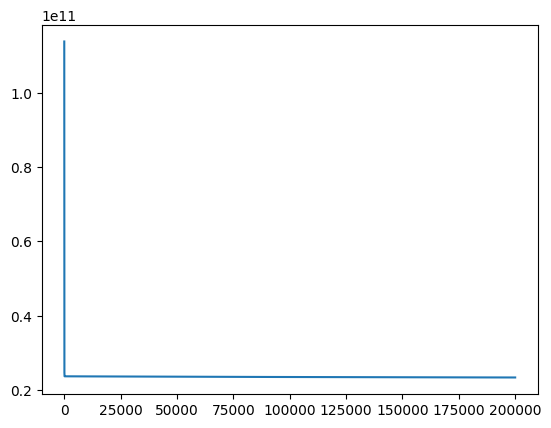

In [16]:
plt.plot(errors);

Отже, на основі првоедених тестувань значення швидкості навчання (learning rate) можна зробити висновок, що найкраще підходить значення  learning rate = 0.0001 .
Інші два значення не підходять:
- learning rate = 0.001 не підходить оскльіки він є завеликим , тому крок градієнтниого спуску фактично перестрибнув через глобальний мінімум функції.
- learning rate = 0.00001 не підходить оскльіки він є замалий для обраної кількості кроків. Фактично модель не встигла досягти оптимальних параметрів.

***3. З scikit-learn.LinearRegression.***

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X, y)

LinearRegression()

In [19]:
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


In [20]:
predictions_sklearn = lin_reg.predict(X)

In [21]:
from sklearn.metrics import  root_mean_squared_error
rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)

print(f'RMSE = {rmse_sklearn}')

RMSE = 4662.505766636395


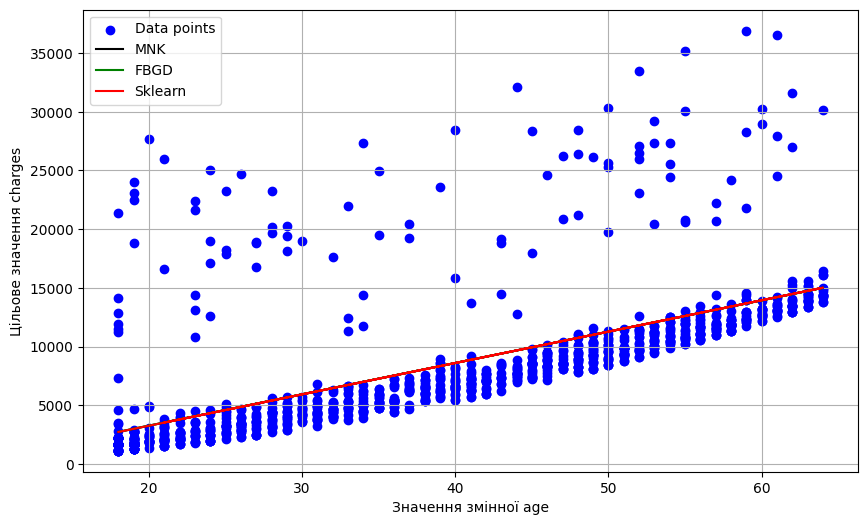

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='black', label='MNK')
plt.plot(X[:, 0], predictions_fbgd_2, color='green', label='FBGD')
plt.plot(X[:, 0], predictions_sklearn, color='red', label='Sklearn')
plt.xlabel('Значення змінної age')
plt.ylabel('Цільове значення charges')
plt.legend()
plt.grid(True)
plt.show()

***Висновки***
- *Зробіть висновки, чи відрізняються результати моделей?*

Так, результати моделіна рівні отриманих значенбь параметрів відрізняються. Особоливо це помітно "Full-Batch градієнтного спуску з numpy". Якщо ж подивитися на зображення всіх троьх ліній регресії на дані діаграми розсіювання, то різниця не так очевидна - лінії перекриваютсья.

- *Чи є знайдені параметри моделі близькими до ваших найкращих припущень?*

Так, параметри моделі є близькими до моїх найкращих припущень.


 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [23]:
from sklearn.metrics import  r2_score

smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


In [24]:
X = smoker_df[['age']].to_numpy()
y = smoker_df['charges'].to_numpy()

In [25]:
lin_reg = LinearRegression()

In [26]:
lin_reg.fit(X, y)

LinearRegression()

In [27]:
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з sklearn:  20294.128126915966 [305.23760211]


In [28]:
predictions_sklearn = lin_reg.predict(X)

In [29]:
r2 = r2_score(y, predictions_sklearn)
rmse = root_mean_squared_error(y, predictions_sklearn)

print('R2: ', r2)
print('RMSE: ', rmse)

R2:  0.13558924096084068
RMSE:  10711.00334810241


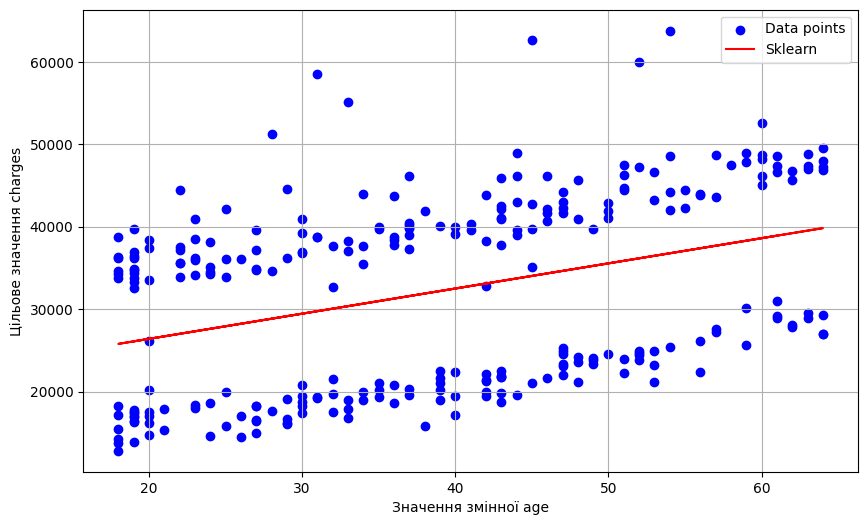

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_sklearn, color='red', label='Sklearn')
plt.xlabel('Значення змінної age')
plt.ylabel('Цільове значення charges')
plt.legend()
plt.grid(True)
plt.show()

***Висновки:***

З графіку видно, що модель демонструє наявність двох виражених груп, між якими проходить лінія регресії, що призводить до великої похибки RMSE. В результаті це говорить нам, що курці з нижньої групи будуть переплачувати, а курці з верхньої групи недоплачувати компанії. Все це несе певні єкономічні ризики компанії. Тому модель не є хорошую та її не варто використовувати в компанії.
